In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dataclasses
from fastlisaresponse import ResponseWrapper
from lisatools.sensitivity import A1TDISens, E1TDISens
from lisatools.detector import EqualArmlengthOrbits
from lisatools_wdm.datacontainer import DataResidualArray
from lisatools_wdm.sensitivity import SensitivityMatrix
from lisatools_wdm.analysiscontainer import AnalysisContainer
from lisatools_wdm.waveform import GBWave
from lisatools_wdm.plotting import plot_ae_time_domain, plot_ae_freq_domain
from tqdm.auto import tqdm, trange


use_gpu=False
T=0.25
t0=100000.0
sampling_frequency=0.1
order=25
tdi_gen="2nd generation"
index_lambda=6
index_beta=7
Nf=64
A=1.084702251e-22
f=2.35962078e-3
fdot=1.47197271e-17
iota=1.11820901
phi0=4.91128699
psi=2.3290324
beta=0.9805742971871619
lam=5.22979888

[11:58:22] INFO     Using NumPy+numba backend                                                         ]8;id=920234;file:///home/avaj040/Documents/projects/pywavelet/package/src/pywavelet/backend.py\backend.py]8;;\:]8;id=67376;file:///home/avaj040/Documents/projects/pywavelet/package/src/pywavelet/backend.py#28\28]8;;\

In [3]:
default_args = [A, f, fdot, iota, phi0, psi, lam, beta]
dt = 1.0 / sampling_frequency

tdi_kwargs_esa = {
    "order": order,
    "tdi": tdi_gen,
    "tdi_chan": "AE",
}

gb = GBWave(use_gpu)

gb_lisa_esa = ResponseWrapper(
    gb,
    T,
    dt,
    index_lambda,
    index_beta,
    t0=t0,
    flip_hx=False,
    use_gpu=use_gpu,
    remove_sky_coords=True,
    is_ecliptic_latitude=True,
    remove_garbage=True,
    orbits=EqualArmlengthOrbits(),
    **tdi_kwargs_esa,
)


ae_data = gb_lisa_esa(*default_args)
data = DataResidualArray(ae_data, dt=dt, Nf=Nf)

sens_mat = SensitivityMatrix(
    data.f_arr,
    [A1TDISens, E1TDISens],
    f_grid=data.f_grid,
    t_grid=data.t_grid,
    dt=dt
)


Text(0, 0.5, 'Characteristic Strain')

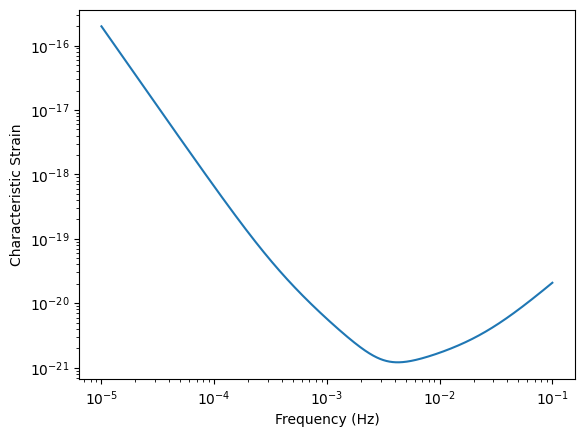

In [5]:
char_strain = gb(A=A, f=f, fdot=fdot, iota=iota, phi0=phi0, psi=psi, T=T, dt=dt)

(np.float64(1.2091496073288281e-21), np.float64(1.986198800307744e-16))

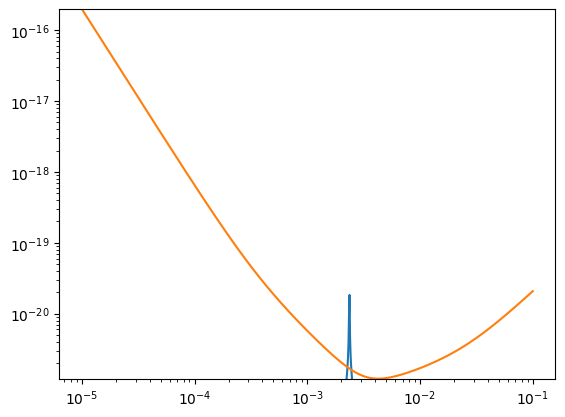

In [9]:
# periodogram of char_strain

from scipy.signal import periodogram

f, Pxx = periodogram(char_strain, fs=1/dt, nfft=2**12)
plt.loglog(f, np.sqrt(Pxx))
plt.loglog(fn, Sn_char_strain)
plt.ylim(min(Sn_char_strain), max(Sn_char_strain))